---  
## Become a Probability & Statistics Master

In [62]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [74]:
df = pd.read_csv('./datasets/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
# tabela de frequência -----------------------------------------------------------------------
# (para variáveis categóricas)

col = 'LotConfig'
freq = pd.concat( [ df[col].value_counts(),
                    df[col].value_counts().cumsum(),
                    round(df[col].value_counts(normalize=True)*100, 2),
                    round(df[col].value_counts(normalize=True).cumsum()*100, 2)],
                    axis=1,
                    keys = ("freq", "freq_acum", 'freq_rel_%', 'freq_rel_acum_%'))

freq

,freq,freq_acum,freq_rel_%,freq_rel_acum_%
Inside,1052,1052,72.05,72.05
Corner,263,1315,18.01,90.07
CulDSac,94,1409,6.44,96.51
FR2,47,1456,3.22,99.73
FR3,4,1460,0.27,100.00


<AxesSubplot: >

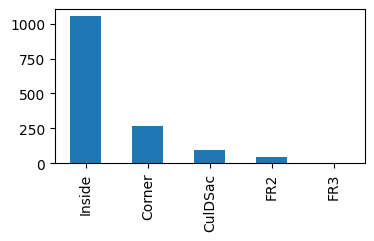

In [76]:
df[col].value_counts().plot(kind='bar', figsize=(4,2))

In [77]:
# pivot table --------------------------------------------------------------------------------
pivot = df.pivot_table(index='LandSlope', columns='LotShape', values='Id', 
                       aggfunc='count',
                       fill_value=0,
                       margins=True, margins_name='Total')
pivot

LotShape,IR1,IR2,IR3,Reg,Total
LandSlope,,,,,
Gtl,448,33,9,892,1382
Mod,29,5,0,31,65
Sev,7,3,1,2,13
Total,484,41,10,925,1460


In [78]:
# pivot table freq --------------------------------------------------------------------------------
func = lambda x: round(x.count()/df.shape[0] * 100, 2)

pivot = df.pivot_table(index='LandSlope', columns='LotShape', values='Id',
                       aggfunc=func,
                       fill_value=0,
                       margins=True, margins_name='Total%')
pivot

LotShape,IR1,IR2,IR3,Reg,Total%
LandSlope,,,,,
Gtl,30.68,2.26,0.62,61.10,94.66
Mod,1.99,0.34,0.00,2.12,4.45
Sev,0.48,0.21,0.07,0.14,0.89
Total%,33.15,2.81,0.68,63.36,100.00


In [79]:
# joint distributions --------------------------------------------------------------------------------
df = df[df['LotFrontage'].isna()==False]
df[['LotFrontage', 'LotArea']].isna().sum()

LotFrontage    0
LotArea        0
dtype: int64

In [80]:
df['LotFrontage_bins'] = pd.cut( df['LotFrontage'], bins= [0,20,60,80,float("Inf")], labels=['0_20','20_60','60_80', '80+'])
df['LotArea_bins'] = pd.cut( df['LotArea'], bins= [0,2000,8000,12000,float("Inf")], labels=['0_2k','2k_8k','8k_12k','12k+'])

In [132]:
func = lambda x: round(x.count()/df.shape[0] * 100, 2)

pivot = df.pivot_table(index='LotFrontage_bins', columns='LotArea_bins', values='Id',
                       aggfunc=func,
                       fill_value=0,
                       margins=True, margins_name='Total%')

pivot

LotArea_bins,0_2k,2k_8k,8k_12k,12k+,Total%
LotFrontage_bins,,,,,
20_60,2,20.65,11.57,3.00,37.22
60_80,0,6.83,27.64,4.66,39.13
80+,0,1.08,11.41,11.16,23.65
Total%,2,28.56,50.62,18.82,100.00


In [131]:
pivot.style.background_gradient(subset=pd.IndexSlice[pivot.index!='Total%', pivot.columns!='Total%'], 
                                #vmin=0, vmax=50,
                                cmap='Blues').format('${0:,.2f}')

LotArea_bins,0_2k,2k_8k,8k_12k,12k+,Total%
LotFrontage_bins,,,,,
20_60,$2.00,$20.65,$11.57,$3.00,$37.22
60_80,$0.00,$6.83,$27.64,$4.66,$39.13
80+,$0.00,$1.08,$11.41,$11.16,$23.65
Total%,$2.00,$28.56,$50.62,$18.82,$100.00
